In [338]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [322]:
# 讀 training data
f = open("training_label.txt",'r',encoding = 'utf8')
lines=f.readlines()

In [323]:
#regularize reviews to lower
lines=[x.lower() for x in lines]

In [324]:
label=[int(l.split('+++$+++')[0]) for l in lines]

In [325]:
corpus=[l for x in lines for l in x.split('+++$+++')[1:]]
corpus=[l.split('\n')[0] for l in corpus]

In [326]:
corpus[1]

' leavingg to wait for kaysie to arrive myspacin itt for now ilmmthek .!'

In [167]:
#tokenize reviews
tokens=[nltk.word_tokenize(x) for x in corpus]

In [168]:
sw=stopwords.words('english')

In [169]:
#remove punctuation 
stemmer = PorterStemmer()
for idx,review in enumerate(tokens):
    tokens[idx]=[x for x in review if x not in sw if x.isalpha()]

In [170]:
#lemmatize words
wl=WordNetLemmatizer()
for idx,review in enumerate(tokens):
    temp=[wl.lemmatize(x,pos='v') for x in review]
    temp=[wl.lemmatize(x,pos='a') for x in temp]
    #stem words
    tokens[idx]=[stemmer.stem(x) for x in temp]

In [171]:
tokens=[(" ").join(x) for x in tokens]

In [172]:
#vectorizer = TfidfVectorizer(min_df=0.001)
vectorizer = TfidfVectorizer()

In [174]:
vectorizer.fit(tokens[:10000])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [175]:
tf_idf=vectorizer.transform(tokens[:10000]).toarray()

In [176]:
tf_idf=pd.DataFrame(tf_idf)

In [292]:
label=pd.DataFrame(label[:10000])

In [34]:
params={'objective': 'binary:logistic','eval_metric':'error','booster':'gbtree','nthread':2,'seed':0,
        'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                  'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [30]:
trainset_X,val_X,trainset_Y,val_Y=train_test_split(tf_idf,label,test_size=0.2)

In [32]:
xgb_train=xgb.DMatrix(trainset_X,label=trainset_Y)
xgb_val=xgb.DMatrix(val_X,label=val_Y)

In [33]:
watchlist=[(xgb_train,'train'),(xgb_val,'val')]

In [65]:
plst=list(params.items())
num_rounds=1000

In [369]:
model = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50)

[22:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-error:0.4542
Will train until train-error hasn't improved in 50 rounds.
[22:23:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-error:0.4262
[22:23:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-error:0.4155
[22:23:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-error:0.3981
[22:23:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-error:0.3911
[22:23:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prun

[46]	train-error:0.3175
[22:24:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[47]	train-error:0.3145
[22:24:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[48]	train-error:0.3098
[22:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[49]	train-error:0.3083
[22:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[50]	train-error:0.3073
[22:24:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[51]	train-error:0.307
[22:24:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 ro

[93]	train-error:0.283
[22:25:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[94]	train-error:0.283
[22:25:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[95]	train-error:0.2818
[22:25:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[96]	train-error:0.2819
[22:25:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[97]	train-error:0.2819
[22:25:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[98]	train-error:0.2819
[22:25:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roo

In [68]:
num_rounds=116
watchlist=[(train,'train')]
finalmodel=xgb.train(plst, train, num_rounds, watchlist)

[14:18:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-error:0.4533
[14:18:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-error:0.4321
[14:18:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-error:0.4319
[14:18:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-error:0.4132
[14:18:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-error:0.4055
[14:18:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 prune

[14:19:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[47]	train-error:0.3042
[14:19:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[48]	train-error:0.3022
[14:19:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[49]	train-error:0.3014
[14:19:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[50]	train-error:0.3007
[14:19:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[51]	train-error:0.3012
[14:19:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 

[14:21:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[94]	train-error:0.2756
[14:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[95]	train-error:0.275
[14:21:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[96]	train-error:0.2755
[14:21:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[97]	train-error:0.2758
[14:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[98]	train-error:0.275
[14:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pr

In [327]:
# 讀 test data
f = open("testing_label.txt",'r',encoding = 'utf8')
lines=f.readlines()

In [328]:
#regularize reviews to lower
lines=[x.lower() for x in lines]

In [329]:
label=[int(l.split('#####')[0]) for l in lines if len(l)>1]

In [180]:
corpus=[l for x in lines for l in x.split('#####')[1:] if len(l)>1]
corpus=[l.split('\n')[0] for l in corpus]

In [181]:
tokens=[nltk.word_tokenize(x) for x in corpus]

In [182]:
#remove punctuation 
stemmer = PorterStemmer()
for idx,review in enumerate(tokens):
    tokens[idx]=[x for x in review if x not in sw if x.isalpha()]

In [183]:
#lemmatize words
wl=WordNetLemmatizer()
for idx,review in enumerate(tokens):
    temp=[wl.lemmatize(x,pos='v') for x in review]
    temp=[wl.lemmatize(x,pos='a') for x in temp]
    #stem words
    tokens[idx]=[stemmer.stem(x) for x in temp]

In [184]:
tokens=[(" ").join(x) for x in tokens]

In [185]:
test_tf_idf=vectorizer.transform(tokens).toarray()
test_tf_idf=pd.DataFrame(test_tf_idf)

In [307]:
predict=finalmodel.predict(xgb.DMatrix(test_tf_idf))

In [308]:
predict=(predict>0.5).astype(int)

In [330]:
true=np.asarray(label)

In [332]:
cnf_matrix = confusion_matrix(true, predict)

[Text(0, 0.5, 'pred P'), Text(0, 1.5, 'pred F')]

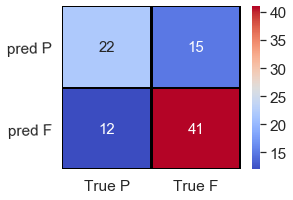

In [333]:
df_cm = pd.DataFrame(cnf_matrix, index = ['pred P','pred F'],
                  columns = ['True P','True F'])
plt.figure(figsize = (4,3))
plt.yticks(rotation = 0)
sn.set(font_scale=1.4)#for label size
ax=sn.heatmap(df_cm, annot=True, annot_kws={"size": 15},cmap= 'coolwarm', linewidths=1.5, linecolor='black')# font size
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_yticklabels(ax.get_yticklabels(), rotation=1)

In [367]:
print('precision:',*precision_recall_fscore_support(true, predict, average=None, labels=[0])[0])
print('recall:',*precision_recall_fscore_support(true, predict, average=None, labels=[0])[1])
print('fscore:',*precision_recall_fscore_support(true, predict, average=None, labels=[0])[2])
print('accuracy:',accuracy_score(true, predict))

precision: 0.6470588235294118
recall: 0.5945945945945946
fscore: 0.619718309859155
accuracy: 0.7


In [287]:
##Ada boost
weakClassifier=DecisionTreeClassifier(max_depth= 1 )
clf=AdaBoostClassifier(base_estimator=weakClassifier,algorithm= 'SAMME' ,n_estimators= 300 ,learning_rate= 0.8 ) 

In [293]:
clf.fit(tf_idf,label)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [295]:
predictAda=clf.predict(test_tf_idf)

In [296]:
cnf_matrix = confusion_matrix(true, predictAda)

[Text(0, 0.5, 'pred P'), Text(0, 1.5, 'pred F')]

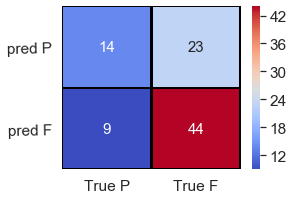

In [297]:
df_cm = pd.DataFrame(cnf_matrix, index = ['pred P','pred F'],
                  columns = ['True P','True F'])
plt.figure(figsize = (4,3))
plt.yticks(rotation = 0)
sn.set(font_scale=1.4)#for label size
ax=sn.heatmap(df_cm, annot=True, annot_kws={"size": 15},cmap= 'coolwarm', linewidths=1.5, linecolor='black')# font size
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_yticklabels(ax.get_yticklabels(), rotation=1)

In [368]:
print('precision:',*precision_recall_fscore_support(true, predictAda, average=None, labels=[0])[0])
print('recall:',*precision_recall_fscore_support(true, predictAda, average=None, labels=[0])[1])
print('fscore:',*precision_recall_fscore_support(true, predictAda, average=None, labels=[0])[2])
print('accuracy:',accuracy_score(true, predictAda))

precision: 0.6086956521739131
recall: 0.3783783783783784
fscore: 0.4666666666666667
accuracy: 0.6444444444444445
